In [19]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

In [20]:
data=pd.read_csv('./mnist_data/train.csv')
ans=pd.read_csv('./mnist_data/test.csv')

In [21]:
test=ans.values
train=data.values

In [22]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.decomposition import PCA
import datetime

In [36]:
pca=PCA(n_components=320)
new_train=pca.fit_transform(train[:,1:])


In [37]:
new_test=pca.fit_transform(train[40000:,1:])

In [39]:
cls=knn()
cls.fit(new_train[:1000,:],train[:1000,0])


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [42]:
cls.score(new_train[40000:,:],train[40000:,0])

0.872

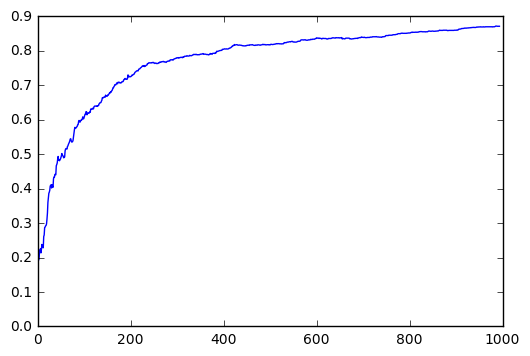

In [48]:
acc=[]
for ix in range(6,1000):
    cls=knn()
    cls.fit(new_train[:ix,:],train[:ix,0])
    #cls.score(new_train[40000:,:],train[40000:,0])
    acc.append(cls.score(new_train[40000:,:],train[40000:,0]))
acc=np.array(acc)
plt.plot(acc)
plt.show()